# From First Principles: K-Means Clustering on Handwritten Digits

## Christian Nielsen and Trevor Joncich

---



In [ ]:
# Load libraries here
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
from keras.datasets import mnist

## Part 1
### Load and Plot the data

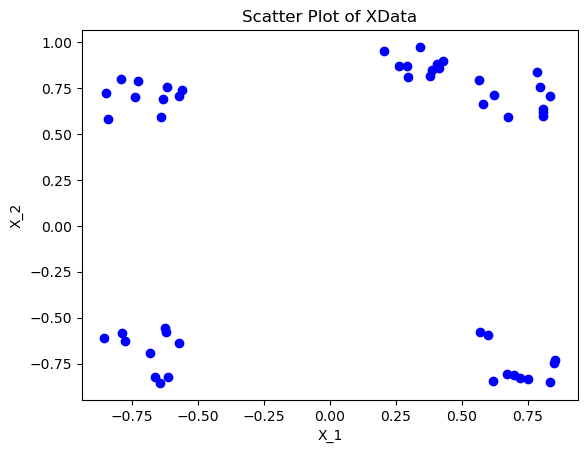

In [126]:
XData = np.array([
    [0.6765, 0.5918],
    [0.5812, 0.6652],
    [0.8058, 0.6215],
    [0.7944, 0.7535],
    [0.5650, 0.7928],
    [0.8339, 0.7048],
    [0.8073, 0.5965],
    [0.7850, 0.8348],
    [0.8069, 0.6349],
    [0.6210, 0.7138],
    [-0.7379, 0.7008],
    [-0.5589, 0.7385],
    [-0.5736, 0.7042],
    [-0.7257, 0.7889],
    [-0.6339, 0.6900],
    [-0.8412, 0.5835],
    [-0.6177, 0.7538],
    [-0.8474, 0.7242],
    [-0.6412, 0.5902],
    [-0.7921, 0.8004],
    [0.5987, -0.5925],
    [0.8342, -0.8533],
    [0.6703, -0.8068],
    [0.7192, -0.8266],
    [0.5689, -0.5771],
    [0.8486, -0.7488],
    [0.7504, -0.8367],
    [0.6195, -0.8452],
    [0.6979, -0.8121],
    [0.8545, -0.7290],
    [-0.5705, -0.6398],
    [-0.6828, -0.6950],
    [-0.6455, -0.8556],
    [-0.6224, -0.5790],
    [-0.8546, -0.6097],
    [-0.6269, -0.5580],
    [-0.7888, -0.5812],
    [-0.6645, -0.8255],
    [-0.7767, -0.6280],
    [-0.6155, -0.8258],
    [0.2909, 0.8697],
    [0.4268, 0.9000],
    [0.4073, 0.8819],
    [0.4134, 0.8604],
    [0.3778, 0.8134],
    [0.3427, 0.9740],
    [0.2629, 0.8677],
    [0.3876, 0.8476],
    [0.2967, 0.8078],
    [0.2060, 0.9495]
])

# Plot XData
plt.scatter(XData[:, 0], XData[:, 1], c='blue', marker='o')
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Scatter Plot of XData')
plt.show()

## Create a k++ initialization function.

In [127]:


def kpp_initialize(x, k, random_state = None, manual_init = None):
    """
    (array, int, int, int) -> array
    Initialize k centroids using the k++ initialization method.

    Args:
      x: The dataset
      k: The number of clusters
      random_state: Determines random number generation seed. Usefull to make "randomness" deterministic and results reproducable.
      manual_init: manually sets the first centroid

    Returns:
      centroids: An array of k initialized centroids

    """

    # Initialize a list of centroids, the first element of the list is a randomly selected point in the dataset (c1)
    np.random.seed(random_state)

    if manual_init is not None:
        centroids = [x[manual_init]]

    else:
        centroids = [x[np.random.choice(x.shape[0])]]


    # Loop for selecting c2, c3,..., ck
    for _ in range(1, k):
        # Calculate the distance from each point in the dataset to the nearest centroid
        distances = np.array([min([np.linalg.norm(point - centroid) for centroid in centroids]) for point in x])

        # Find the index of the point furthest from its nearest centroid
        furthest_point_index = np.argmax(distances)

        # Assign this point as the next centroid (cl)
        centroids.append(x[furthest_point_index])

    return np.array(centroids)

## Create a random initialization function using a uniform distribution for each component on the interval [-1.2, 1.2].

In [ ]:
def rand_initialize(x, k, random_state = None, manual_init = None):
    """
    (array, int, int, int) -> array
    Randomly initialize k centroids with components on the interval [-1.2, 1.2].

    Args:
      x: The dataset
      k: the number of centroids to initialize
      random_state: Determines random number generation seed. Usefull to make "randomness" deterministic and results reproducable.
      manual_init: manually sets the first centroid

    Returns:
      rep_vecs: k randomly initialized representative vectors.
    """
    # # Creates a list of k values sampled from a uniform distribution between -1.2 and 1.2
    dim = x.shape[1]
    np.random.seed(random_state)
    rep_vecs = [np.random.uniform(-1.2, 1.2, dim) for _ in range(k)]

    return np.array(rep_vecs)

## Create a function that calculates the overall coherence of clusters given a data set and a set of centroids.

In [129]:
def calculate_coherence(x, centroids):
  """
  (array, array) -> float
  Calculate the total within-cluster sum of squares (overall coherence).

  Args:
    x: The dataset
    centroids: The current centroids

  Returns:
    coherence: The overall coherence of the centroids to their nearest data points
  """
  # Calculate the squared Euclidean distance between each point and the nearest centroid
  total_sum_of_squares = 0
  for point in x:
    distances = [np.linalg.norm(point - centroid)**2 for centroid in centroids]
    total_sum_of_squares += min(distances)  # Add the minimum distance to the closest centroid

  return total_sum_of_squares

## Run 10 realizations of the clustering for each initialization with k=5.

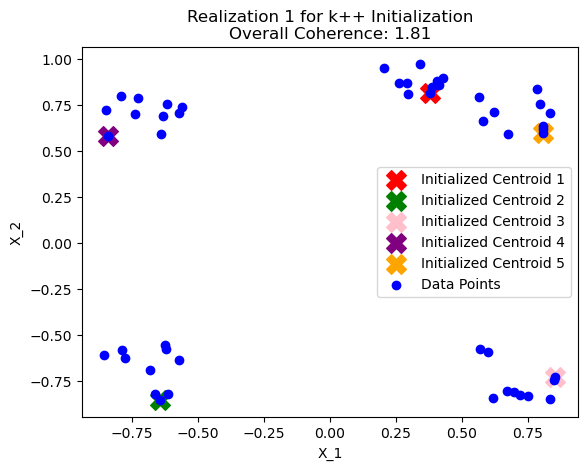

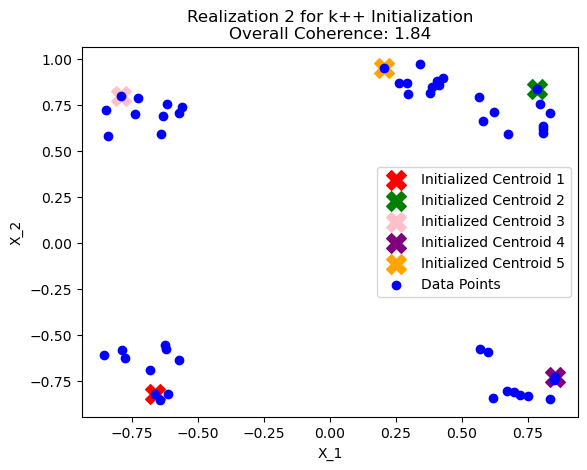

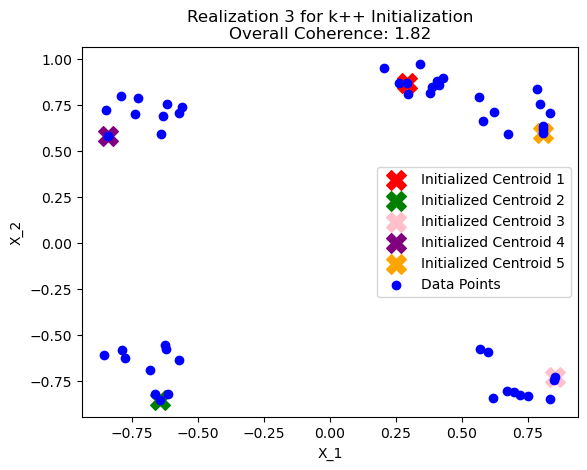

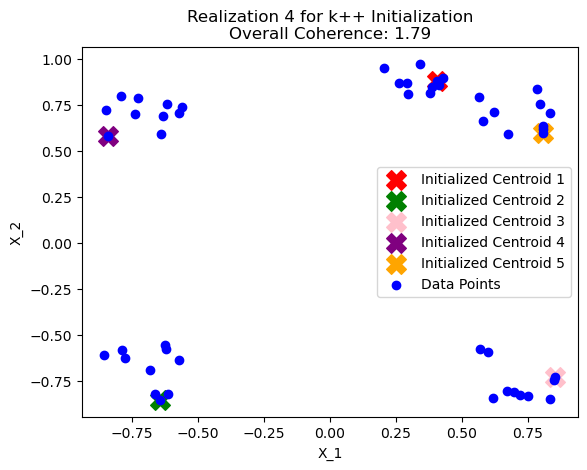

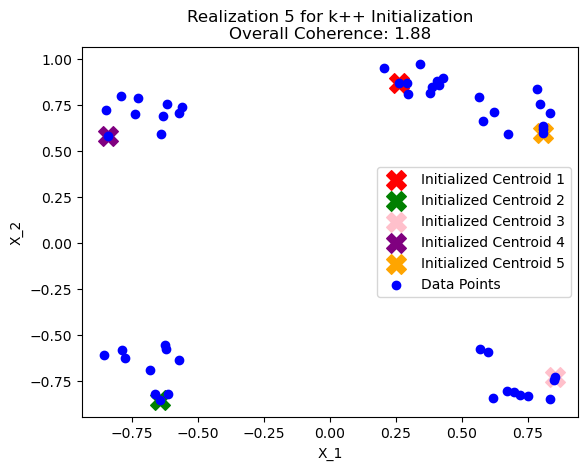

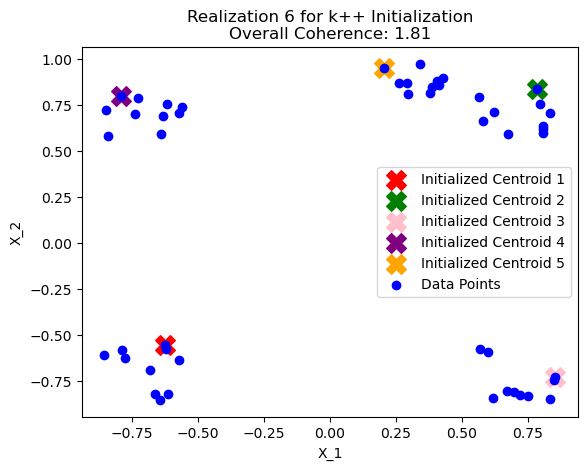

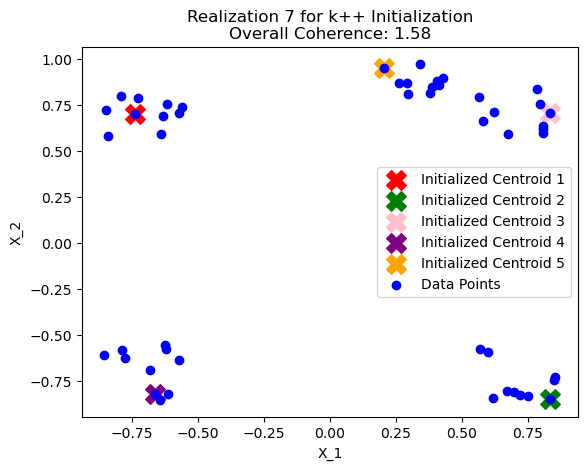

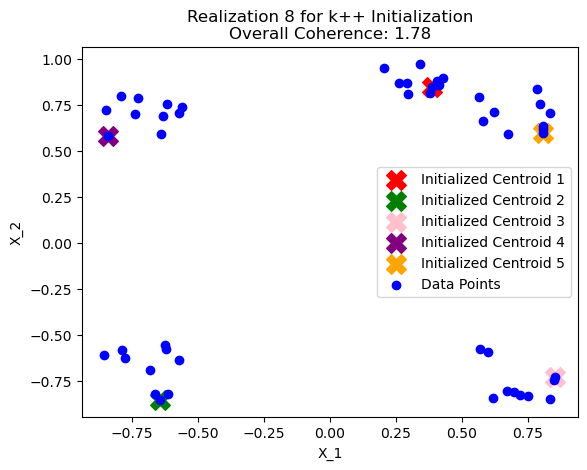

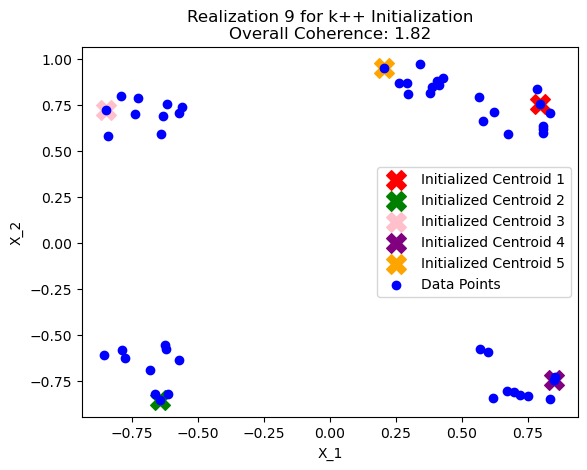

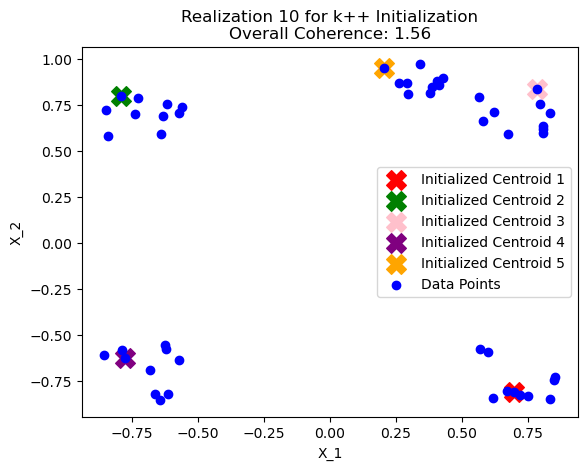

In [130]:
# k++ INITIALIZATION
k = 5
realizations_kpp = []
kpp_coherence = []

for i in range(10):
    centroids = kpp_initialize(XData, k, i) # Note that the random state has been set to the iteration # for reproducable results
    realizations_kpp.append(centroids)

# Plot each realization with scatter plot of data points and centroids
for i, centroids in enumerate(realizations_kpp, 1):
    # Calculate the coherence for the current set of centroids
    coherence = calculate_coherence(XData, centroids)
    kpp_coherence.append(coherence)
    # Plot centroids in different colors
    colors = ['red', 'green', 'pink', 'purple', 'orange']
    for j, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], c=colors[j], s=200, marker='X', label=f'Initialized Centroid {j+1}')

    # Plot XData
    plt.scatter(XData[:, 0], XData[:, 1], c='blue', label='Data Points')

    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.title(f'Realization {i} for k++ Initialization\nOverall Coherence: {coherence:.2f}')
    plt.legend()
    plt.show()

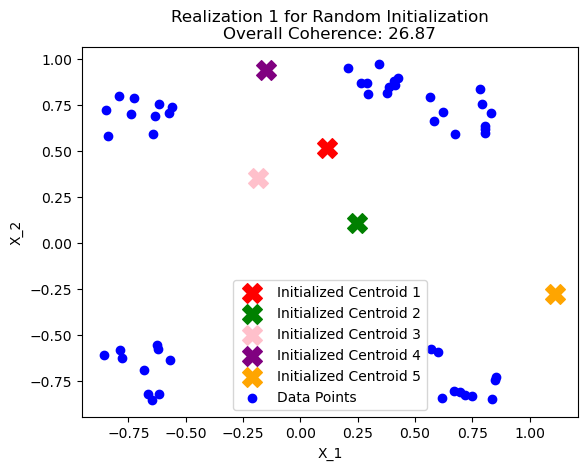

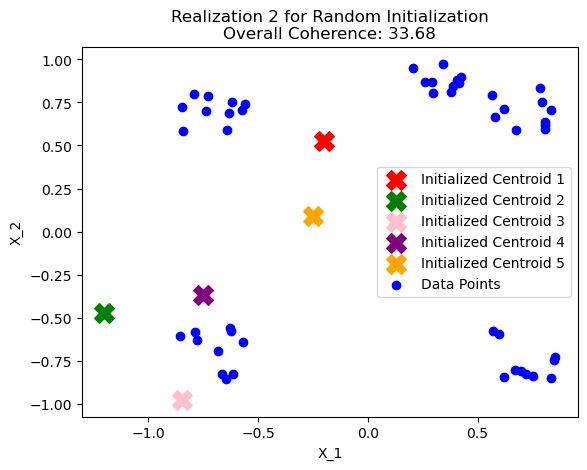

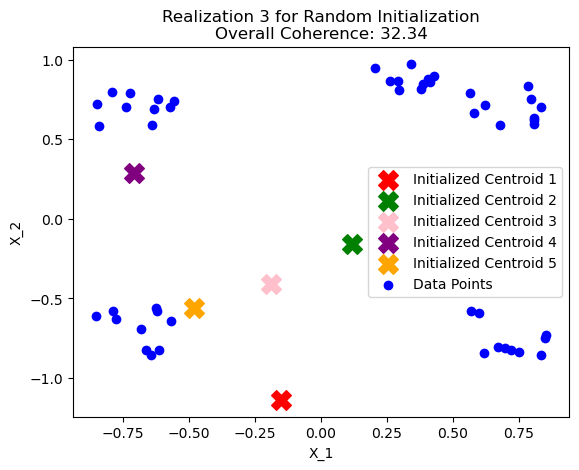

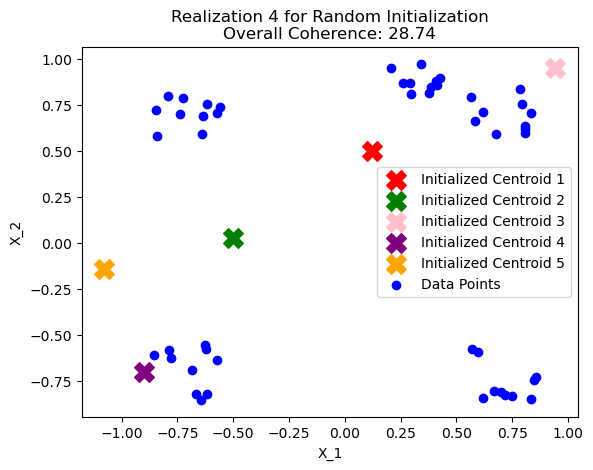

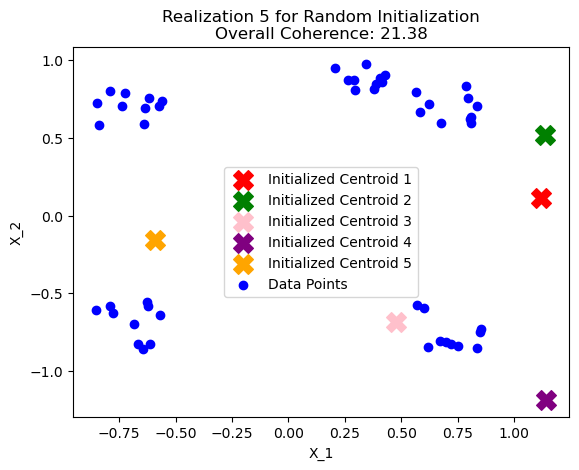

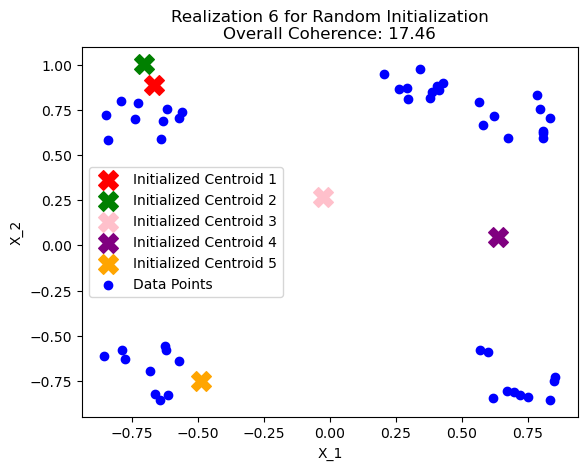

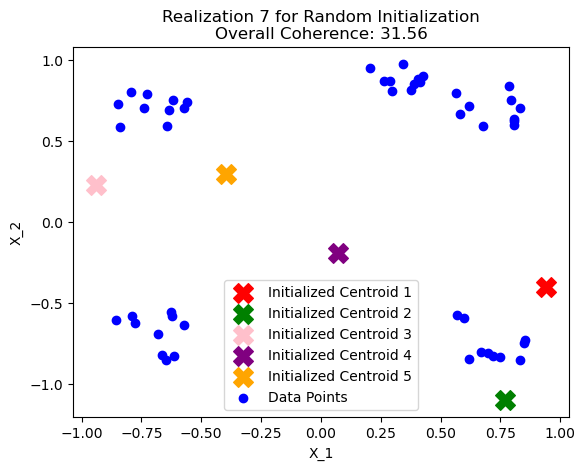

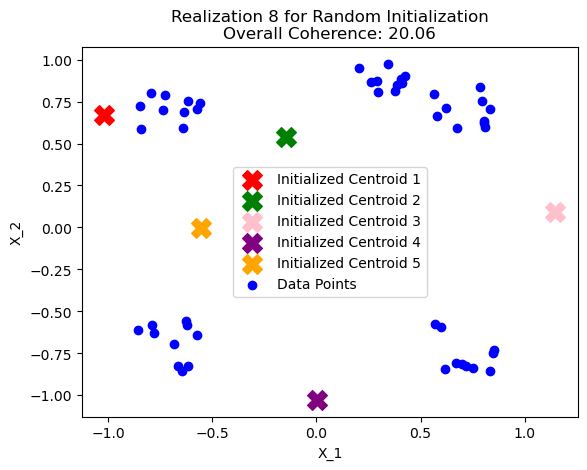

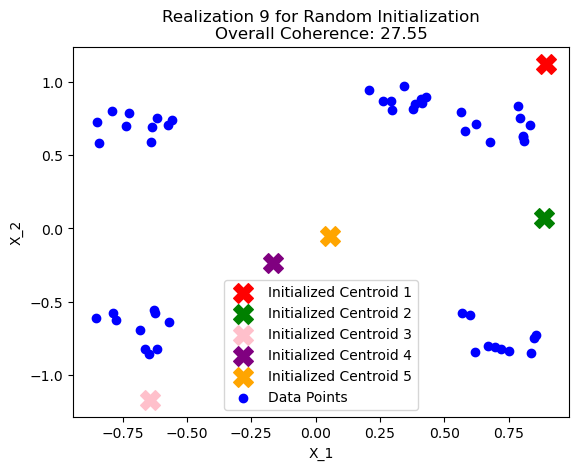

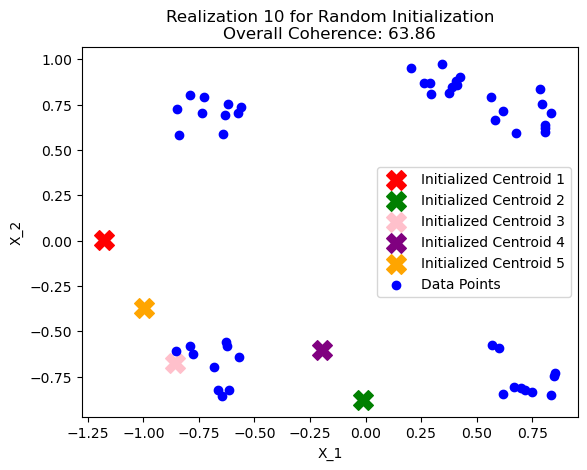

In [131]:
# Random initialization
k = 5
realizations_rand = []
rand_coherence = []

for i in range(10):
    centroids = rand_initialize(XData, k, i) # Note that the random state has been set to the iteration # for reproducable results
    realizations_rand.append(centroids)

# Plot each realization with scatter plot of data points and centroids
for i, centroids in enumerate(realizations_rand, 1):
    # Calculate the coherence for the current set of centroids
    coherence = calculate_coherence(XData, centroids)
    rand_coherence.append(coherence)

    # Plot centroids in different colors
    colors = ['red', 'green', 'pink', 'purple', 'orange']
    for j, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], c=colors[j], s=200, marker='X', label=f'Initialized Centroid {j+1}')

    # Plot XData
    plt.scatter(XData[:, 0], XData[:, 1], c='blue', label='Data Points')

    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.title(f'Realization {i} for Random Initialization\nOverall Coherence: {coherence:.2f}')
    plt.legend()
    plt.show()

## Compare the performance of the two initialization schemes.

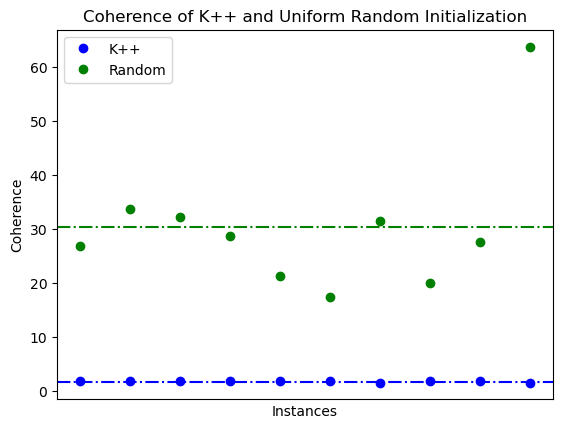

In [132]:
kpp_mean = np.mean(kpp_coherence)
rand_mean = np.mean(rand_coherence)

plt.plot(kpp_coherence, 'bo')
plt.plot(rand_coherence, 'go')

plt.xlabel('Instances')
plt.xticks([])
plt.ylabel('Coherence')
plt.title(f'Coherence of K++ and Uniform Random Initialization')
plt.legend(["K++", "Random"])
plt.axhline(y = kpp_mean, linestyle='-.', color = 'blue')
plt.axhline(y = rand_mean, linestyle='-.', color = 'green')
plt.show()

## Create a k means function that uses the initialization methods above.

(array([[ 0.34121,  0.8772 ],
        [-0.68482, -0.67976],
        [ 0.71622, -0.76281],
        [-0.69696,  0.70745],
        [ 0.7277 ,  0.69096]]),
 array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]))

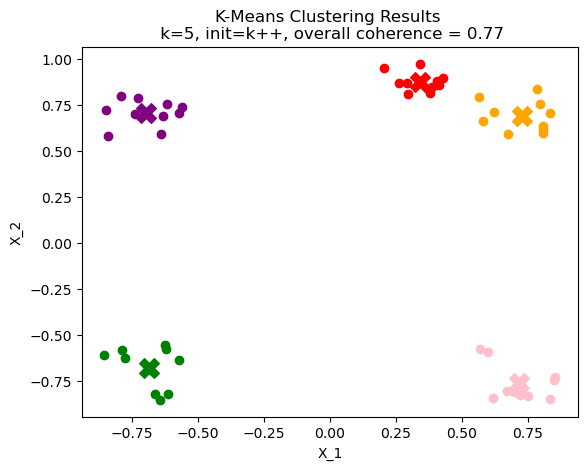

In [123]:
def k_means(x, k, initialization="k++", plot=False, random_state=None, max_itter=300, tol=1e-4, manual_init = None, return_coherence = False):
    """
    (array, int, string) -> array
    Implements the k-means clustering algorithm to group the data points in 'x' into 'k' clusters with minimized overall coherence.

    Args:
    x: The dataset (2D array)
    k: The number of clusters
    initialization: The initialization method used to initialize the centroids, either "k++" or "random" (set to "k++" by default).
    random_state: Determines random number generation seed. Usefull to make "randomness" deterministic and results reproducable.
    plot: Provides plots of data points colored to associated centroid (2D data only)
    max_itter: maximum number of itterations for the itterative scheme
    tol: The tolerance for stopping itterative scheme based on centroid changes.
    manual_init: Manually sets the first centroid.
    return_coherence: Returns the overall coherence of the clusters if set to True.

    Returns:
    centroids: An array of k centroids where the overall coherence converges to a value where it is minimized.
    labels: An array of labels indicating the cluster assignment for each data point.
    """

    # Initialize the centroids
    if initialization == "k++":
        c_init = kpp_initialize(x, k, random_state, manual_init)
    elif initialization == "random":
        c_init = rand_initialize(x, k, random_state, manual_init)
    else:
        raise ValueError('Initialization must be either "k++" or "random" !')

    # Initialize partitions as a NumPy array
    partitions = np.array([np.array(c_init[i]) for i in range(k)])
    labels = np.zeros(len(x), dtype=int)  # Initialize labels array

    for _ in range(max_itter):
        # Reset partitions
        clusters = [[] for _ in range(k)]

        # Assign each vector in the dataset to the nearest partition
        for vec in x:
            dist_comparison = [np.linalg.norm(vec - partitions[j])**2 for j in range(k)]
            argmin = np.argmin(dist_comparison)
            clusters[argmin].append(vec)
            labels[np.where(np.all(x == vec, axis=1))[0][0]] = argmin  # Assign label to the point

        # Store old partitions to check for changes
        old_partitions = partitions.copy()

        # Recalculate Centroids
        for i in range(k):
            if clusters[i]:  # Check if the cluster is not empty
                partitions[i] = np.mean(clusters[i], axis=0)  # Calculate new centroid

        # Check for convergence
        centroid_shifts = np.linalg.norm(partitions - old_partitions, axis=1)  # Calculate the shifts of centroids
        if np.all(centroid_shifts < tol):  # If all shifts are less than tolerance
            break


    coherence = calculate_coherence(x, partitions)

    if plot:
        colors = ['red', 'green', 'pink', 'purple', 'orange',
                'blue', 'cyan', 'magenta', 'brown', 'olive']

        for i in range(k):
            if clusters[i]:
                cluster_points = np.array(clusters[i])
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i])
                plt.scatter(partitions[i][0], partitions[i][1], marker='X', s=200, color=colors[i])  # Plot centroids
                # Add title and axis labels
                plt.title(f'K-Means Clustering Results \n k={k}, init={initialization}, overall coherence = {coherence:.2f}')
                plt.xlabel('X_1')
                plt.ylabel('X_2')

    if return_coherence:
        return coherence
    else:
        return partitions, labels

k_means(XData, 5, initialization="k++", plot = True)

# Comparison of Initialization Methods on K-Means Algorithm

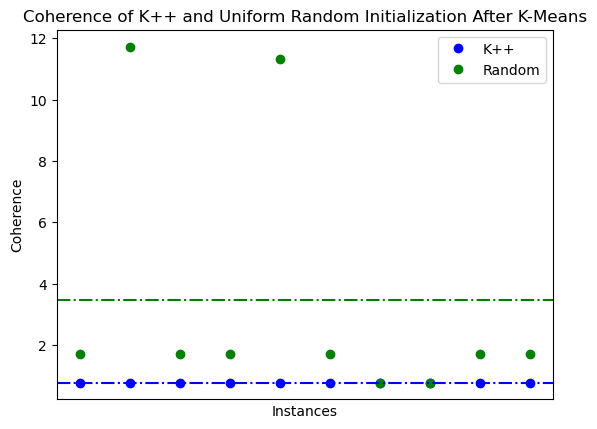

In [139]:
kpp_coherence = []
rand_coherence = []

# Run 10 realizations of the k-means algorithm with rand and k++ initializations, and then save the coherence values

for i in range(10):
    kpp_coherence.append(k_means(XData, 5, initialization="k++", return_coherence=True, random_state=i))
    rand_coherence.append(k_means(XData, 5, initialization="random", return_coherence=True, random_state=i))

# Calculate mean coherence

kpp_mean = np.mean(kpp_coherence)
rand_mean = np.mean(rand_coherence)

# Plot the instances

plt.plot(kpp_coherence, 'bo')
plt.plot(rand_coherence, 'go')

plt.xlabel('Instances')
plt.xticks([])
plt.ylabel('Coherence')
plt.title(f'Coherence of K++ and Uniform Random Initialization After K-Means')
plt.legend(["K++", "Random"])
plt.axhline(y = kpp_mean, linestyle='-.', color = 'blue')
plt.axhline(y = rand_mean, linestyle='-.', color = 'green')
plt.show()

## Elbow Method: Plot the overall coherence after running k-means clustering at each value k (2-8) to determine the optimal number of clusters.

In [142]:
def elbow(x, lb, ub, init_type, random_state = None, manual_init = None):
    """
    (array, int, int, str, int, array) -> list
    Compute coherence values for k-means clustering over a range of cluster values.

    Args:
      x: The dataset.
      lb: The lower bound for the number of clusters (minimum k value).
      ub: The upper bound for the number of clusters (maximum k value).
      init_type: The initialization method for centroids.
      random_state: Determines random number generation seed.
      manual_init: Manually set the initial centroids.

    Returns:
      coherence_list: A list of coherence values.

    """

    coherence_list = []

    for i in range(lb, ub+1):
        if random_state is not None:
            centroids, labels = k_means(x, k = i, initialization = init_type, random_state=random_state, manual_init = manual_init)
            coherence_list.append(calculate_coherence(x, centroids))
        else:
            centroids, labels = k_means(x, k = i, initialization = init_type, manual_init = manual_init)
            coherence_list.append(calculate_coherence(x, centroids))
    return coherence_list


def elbow_plot(x, lb, ub, init_type, no, random_state = None, manual_init = None):
    """
    (array, int, int, str, int, int, array) -> None
    Plot the coherence values for multiple k-means realizations over a range of cluster values.

    Args:
      x: The dataset.
      lb: The lower bound for the number of clusters (minimum k value).
      ub: The upper bound for the number of clusters (maximum k value).
      init_type: The initialization method for centroids (e.g., 'random', 'kmeans++').
      no: The number of realizations.
      random_state: The base seed for random number generation.
      manual_init: Manually set the initial centroids.

    Returns:
      None: The function generates and displays a plot of coherence values for different k values.

    """

    if random_state is not None:
        kpp_list = [elbow(x, lb, ub, init_type, random_state=i, manual_init = manual_init) for i in range(random_state, random_state + no)]
    else:
        kpp_list = [elbow(x, lb, ub, init_type, manual_init = manual_init) for _ in range(no)]

    plt.ylabel('Coherence')
    plt.xlabel('k-value')
    plt.title(f'Coherence of {no} K-Means Realizations Using {init_type.capitalize()} Initialization')
    xvals = list(range(lb,ub+1))

    for i in kpp_list:
        plt.plot(xvals,i)

    return

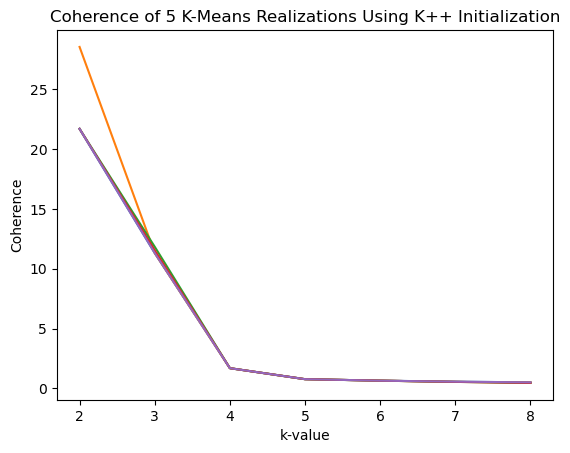

In [143]:
elbow_plot(XData, 2, 8, 'k++', 5, random_state=23)

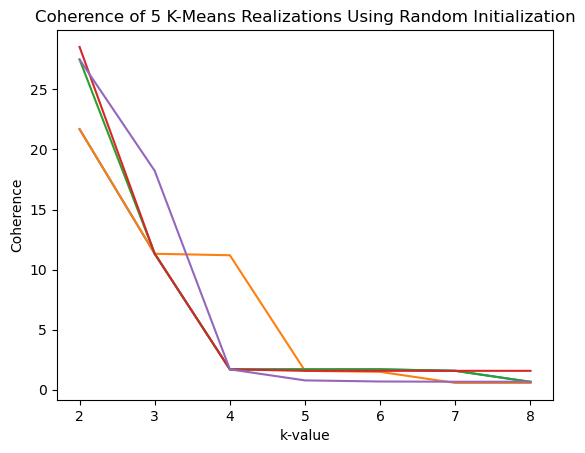

In [144]:
elbow_plot(XData, 2, 8, 'random', 5, random_state=23)

# Part 3

## Read and visualize the data.

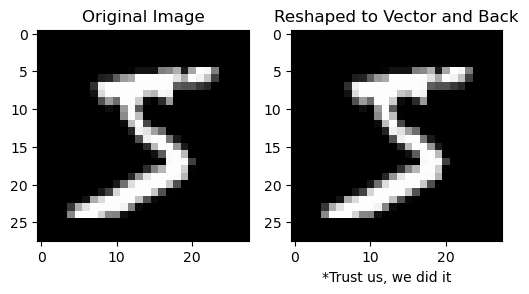

In [84]:
from keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Extract the first 80 images from the training set
NImages = 80
imgs = X_train[:NImages]
actual_labels = y_train[:NImages]

# Reshape each image (28x28) into a 1D vector (784,)
m = 28 * 28 # 28x28 pixels
flat_imgs = np.zeros((NImages, m))

# Convert each image into a vector
for i in range(NImages):
    flat_imgs[i, :] = imgs[i].reshape(1, m)

# Example: Visualize the first image before and after reshaping
plt.figure(figsize=(6,3))

# Original image (28x28)
plt.subplot(1, 2, 1)
plt.imshow(imgs[0], cmap='gray')
plt.title("Original Image")

# Reshaped image vector (flattened)
plt.subplot(1, 2, 2)
plt.imshow(flat_imgs[0].reshape(28, 28), cmap='gray')
plt.title("Reshaped to Vector and Back")
plt.figtext(0.6, 0.01, "*Trust us, we did it", ha="left", fontsize=10)
plt.show()

# Now XData contains the reshaped vectors of the images

## Using K++ initialization, utilize the elbow method to find the "best" k value for the mnist dataset.

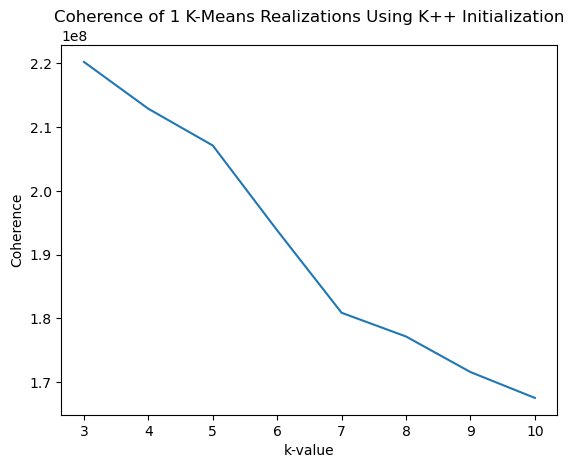

In [85]:
elbow_plot(flat_imgs, 3, 10, "k++", 1, random_state=23, manual_init = 41)

# Run the K-Means Algorithm on the MNIST Dataset

In [62]:
# Run the algorithm and save the outputs (centroids and index set)
centroids, pred_labels = k_means(flat_imgs, 7, manual_init = 41)

In [63]:
def update_labels(pred_labels, actual_labels):
    """
    (array, array) -> array
    Update predicted labels based on the most frequently occurring actual labels.

    Args:
      pred_labels: An array of predicted labels.
      actual_labels: An array of actual labels corresponding to the predicted labels.

    Returns:
      updated_labels: An array of updated labels, where each predicted label is replaced
                      with the most frequently occurring actual label among its corresponding indices.
    """
    # Unique predicted labels
    unique_labels = np.unique(pred_labels)

    # Create a new array for the updated labels
    updated_labels = np.copy(pred_labels)

    # Iterate over each label
    for label in unique_labels:

        # Get the indices of the current label
        label_indices = np.where(pred_labels == label)

        # Find the actual digits corresponding to this label
        associated_digits = actual_labels[label_indices]

        # Count the frequency of each digit
        digit_counts = Counter(associated_digits)

        # Find the maximum frequency
        max_count = max(digit_counts.values())

        # Find all digits that have the maximum frequency
        most_frequent_digits = [digit for digit, count in digit_counts.items() if count == max_count]

        # Choose randomly if there's a tie
        chosen_digit = random.choice(most_frequent_digits)

        # Replace the predicted label with the most frequent digit
        updated_labels[label_indices] = chosen_digit

    return np.array(updated_labels)

In [64]:
# Update pred_labels
pred_labels_u = update_labels(pred_labels, actual_labels)

In [65]:
def calculate_success(pred, actual):
    """
    (array, array) -> float
    Calculate the success rate of predicted labels compared to actual labels.

    Args:
      pred: An array of updated predicted labels.
      actual: An array of actual labels.

    Returns:
      s: The success rate as a percentage of correct predictions.
    """
    matches = np.sum(pred == actual)
    total_indices = len(pred)
    s = matches/total_indices * 100
    return s

calculate_success(pred_labels_u, actual_labels)

52.5

In [66]:
def plot_cluster_images(x, cluster, pred_labels, actual_labels):
    """
    (array, int, array, array) -> None
    Plot images belonging to a specified cluster and display the success rate for those images.

    Args:
      x: An array of images, where each image is represented as a flattened array.
      cluster: The cluster number (or label) for which to plot images.
      pred_labels: An array of predicted labels for the images.
      actual_labels: An array of actual labels for the images.

    Returns:
      None: Displays a plot of images within the specified cluster and their success rate.
    """
    cluster_images = x[pred_labels == cluster]  # Select images for the specified cluster
    cluster_indices = (pred_labels == cluster)
    cluster_pred_labels = pred_labels[cluster_indices]
    cluster_actual_labels = actual_labels[cluster_indices]

    # Calculate the success rate
    success_rate = calculate_success(cluster_pred_labels, cluster_actual_labels)

    num_images = len(cluster_images)
    num_cols = 10  # Number of columns for the plot
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, num_rows*2))  # Adjust the figsize as needed

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(cluster_images[i].reshape(28, 28), cmap='gray')
            ax.axis('off')  # Turn off axis labels
        else:
            ax.axis('off')  # Turn off axis labels for empty subplots

    # Set the overall title with a specified font size
    plt.suptitle(f"Predicted Digit: {cluster}\n Cluster Success: {success_rate:.2f}%", fontsize=25)

    # Adjust layout to make space for the suptitle
    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust rect to create space for the suptitle
    plt.show()


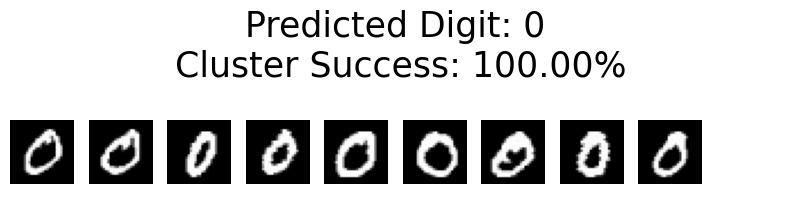

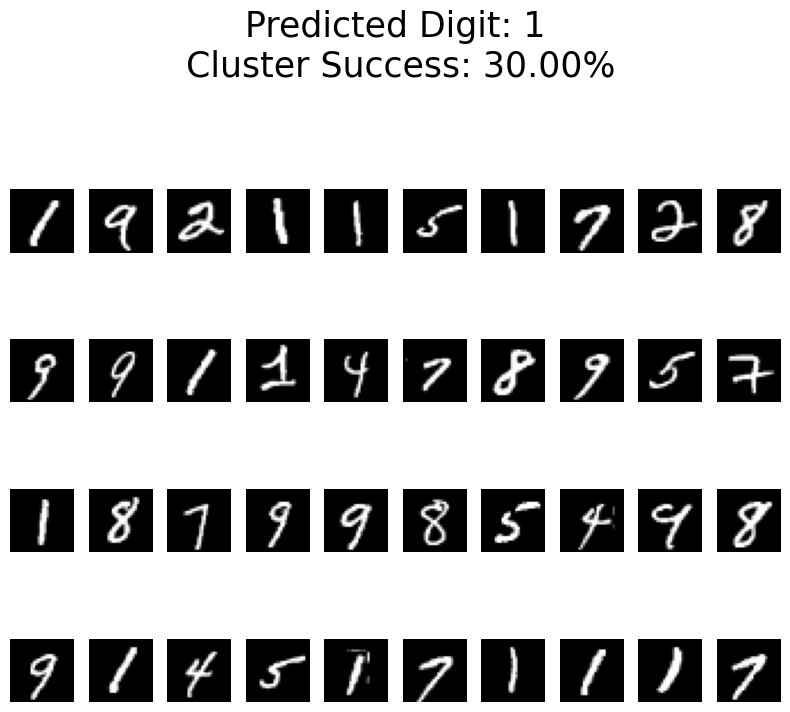

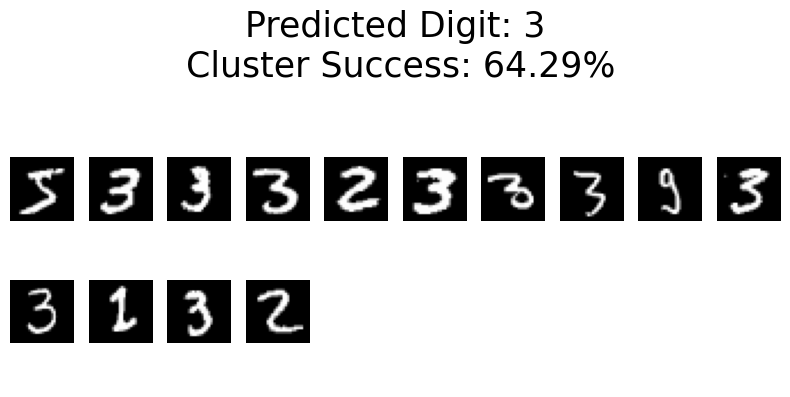

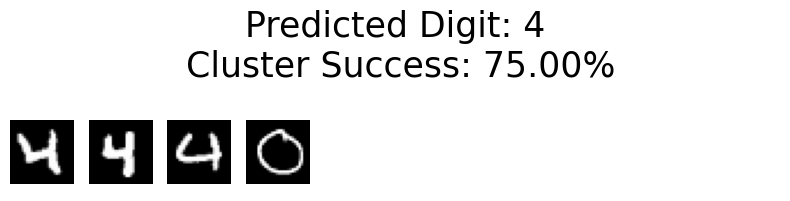

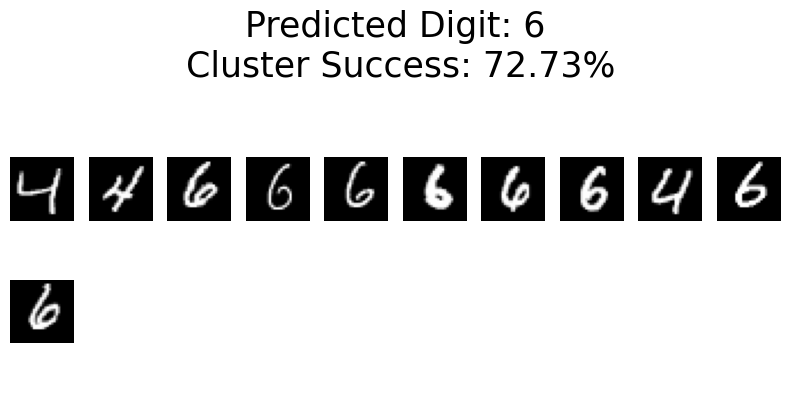

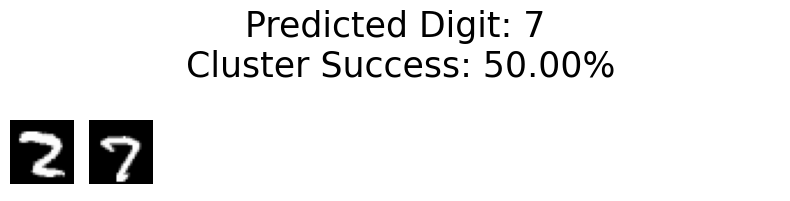

In [67]:
# For each unique value in the predictions, plot all the images with said predicted value. Includes success rate within cluster

unique_preds = np.unique(pred_labels_u)
for i in unique_preds:
    plot_cluster_images(imgs, i, pred_labels_u, actual_labels)

# Visualization of cluster centroids

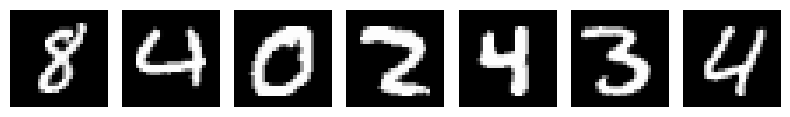

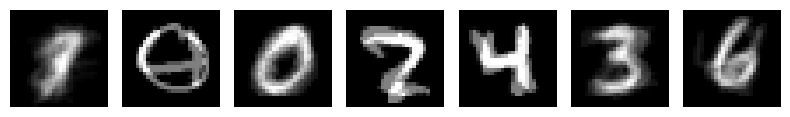

In [68]:
# Run the algorithm and initialize the plots.

k = 7
init_clusters = kpp_initialize(flat_imgs, k, manual_init = 41)
mnist_cent, mnist_labels = k_means(flat_imgs, k, 'k++', manual_init = 41)
fig, axes = plt.subplots(1, k, figsize=(8, 3))

# Plot each initialized centroid in a subplot
for i, ax in enumerate(axes):
    ax.imshow(init_clusters[i].reshape(28,28), cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, k, figsize=(8, 3))

# Plot each post-algorithm centroid in a subplot
for i, ax in enumerate(axes):
    ax.imshow(mnist_cent[i].reshape(28,28), cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Success Rates

In [69]:
# Loops through k=3, ..., 10 k-means algorithm on the MNIST dataset and reports success rate for each value of k

for k in range(3, 11):
    centroids, init_labels = k_means(flat_imgs, k, random_state = 23, manual_init = 41)
    pred_labels_u = update_labels(init_labels, actual_labels)
    success_rate = calculate_success(pred_labels_u, actual_labels)
    print(f"K = {k} ---> Success Rate {success_rate:.2f}%")

K = 3 ---> Success Rate 33.75%
K = 4 ---> Success Rate 35.00%
K = 5 ---> Success Rate 35.00%
K = 6 ---> Success Rate 46.25%
K = 7 ---> Success Rate 52.50%
K = 8 ---> Success Rate 53.75%
K = 9 ---> Success Rate 53.75%
K = 10 ---> Success Rate 53.75%
